# Reliance Industries Stock Data Analysis

## Introduction
This project involves analyzing the stock data of Reliance Industries. The analysis includes data cleaning, preprocessing, visualization, and predictive modeling to gain insights into stock trends and make future predictions.

## Data Visualization: Closing Prices Over Time

In this section, we will visualize the closing prices of Reliance Industries' stock over time. This helps us identify trends and patterns in the stock prices.

### Steps:

1. **Load the CSV file**: We load the stock data from a CSV file into a pandas DataFrame.
2. **Plot the Closing Prices**: We use matplotlib to plot the closing prices over time.

### Code:

In [47]:
import pandas as pd
# Load the CSV file
reliance_data= pd.read_csv(r"C:\Users\addu7\Downloads\Stock-Data-Reliance.csv")

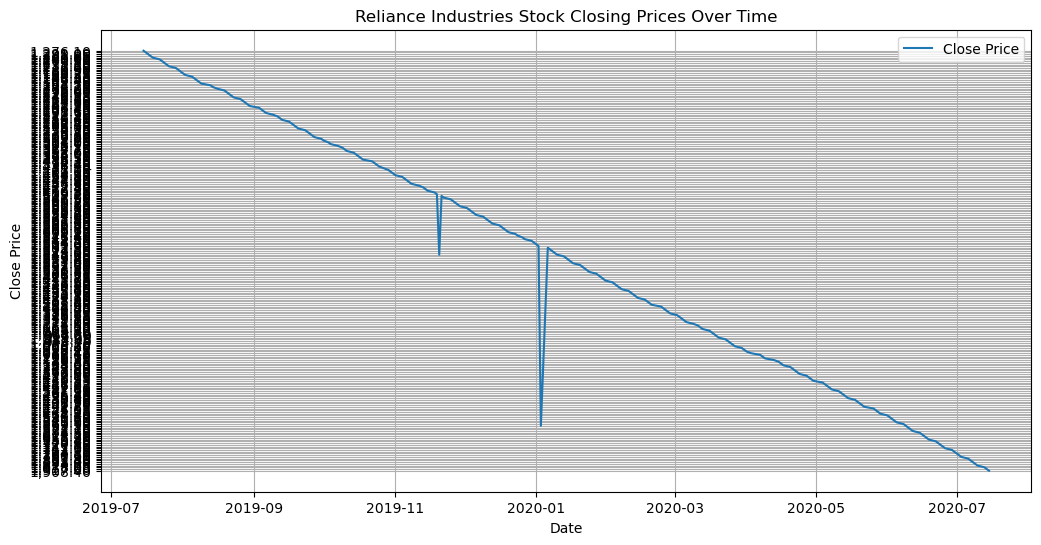

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
reliance_data = pd.read_csv(r"C:\Users\addu7\Downloads\Stock-Data-Reliance.csv")

# Convert the 'Date' column to datetime format
reliance_data['Date'] = pd.to_datetime(reliance_data['Date'], errors='coerce')

# Ensure there are no missing or non-numeric values in 'Date' and 'Close' columns
reliance_data.dropna(subset=['Date', 'Close'], inplace=True)

# Plot the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(reliance_data['Date'], reliance_data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Reliance Industries Stock Closing Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()


## Data Cleaning, Preprocessing, and Visualization: Closing Prices with Moving Averages

In this section, we will clean the stock data, calculate moving averages, and visualize the closing prices of Reliance Industries' stock over time. This helps us identify trends and patterns in the stock prices.


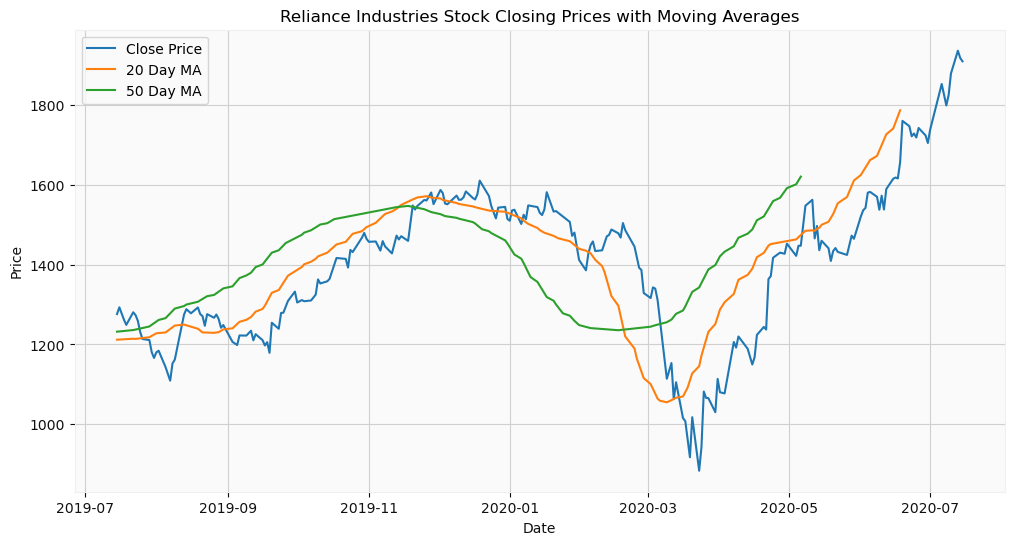

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
reliance_data= pd.read_csv(r"C:\Users\addu7\Downloads\Stock-Data-Reliance.csv")


# Convert the 'Date' column to datetime format
reliance_data['Date'] = pd.to_datetime(reliance_data['Date'], errors='coerce')

# Replace '-' with NaN
reliance_data.replace('-', np.nan, inplace=True)

# Remove non-numeric rows from the relevant columns
for column in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    reliance_data[column] = pd.to_numeric(reliance_data[column].str.replace(',', ''), errors='coerce')

# Drop any rows with NaN values in the relevant columns
reliance_data.dropna(subset=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], inplace=True)

# Calculate the moving averages
reliance_data['20 Day MA'] = reliance_data['Close'].rolling(window=20).mean()
reliance_data['50 Day MA'] = reliance_data['Close'].rolling(window=50).mean()

# Plot the closing prices with moving averages
plt.figure(figsize=(12, 6))
plt.plot(reliance_data['Date'], reliance_data['Close'], label='Close Price')
plt.plot(reliance_data['Date'], reliance_data['20 Day MA'], label='20 Day MA')
plt.plot(reliance_data['Date'], reliance_data['50 Day MA'], label='50 Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Reliance Industries Stock Closing Prices with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()


## Daily Percentage Change in Closing Prices

In this section, we will calculate and visualize the daily percentage change in the closing prices of Reliance Industries' stock. This helps us understand the daily volatility and trends in the stock prices.


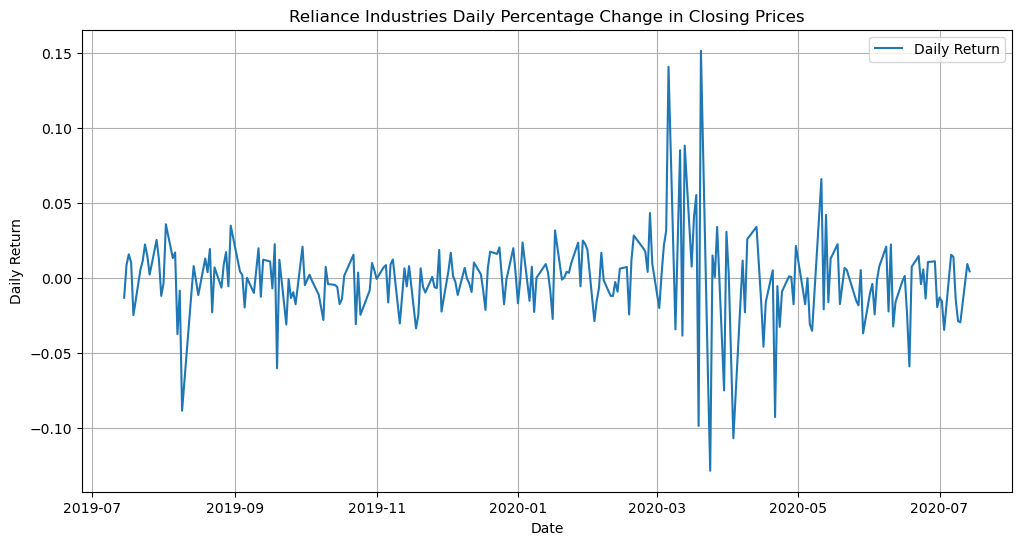

In [36]:
# Calculate the daily percentage change
reliance_data['Daily Return'] = reliance_data['Close'].pct_change()

# Plot the daily percentage change
plt.figure(figsize=(12, 6))
plt.plot(reliance_data['Date'], reliance_data['Daily Return'], label='Daily Return')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Reliance Industries Daily Percentage Change in Closing Prices')
plt.legend()
plt.grid(True)
plt.show()


## Trading Volume Over Time

In this section, we will visualize the trading volume of Reliance Industries' stock over time. This helps us understand the trading activity and liquidity of the stock.


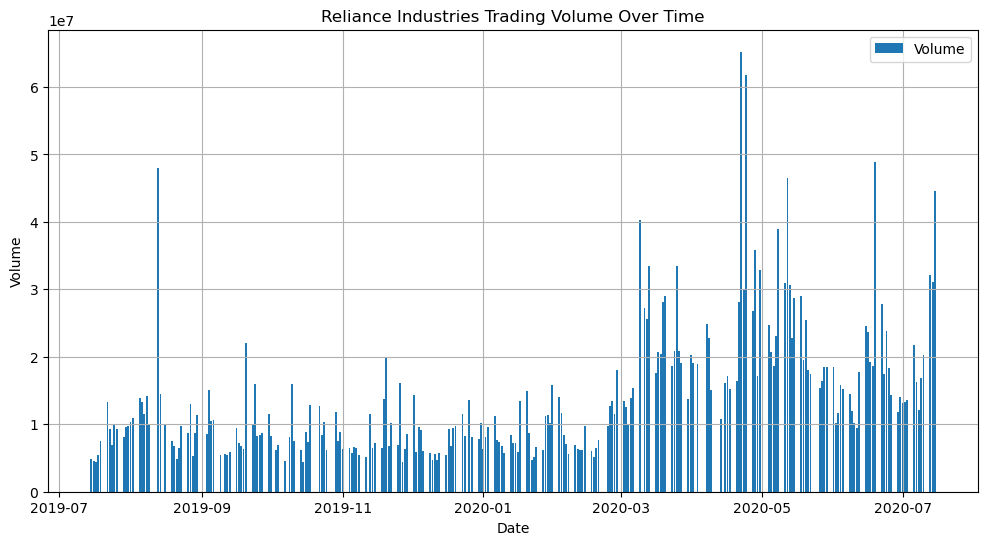

In [38]:
# Plot the trading volume over time
plt.figure(figsize=(12, 6))
plt.bar(reliance_data['Date'], reliance_data['Volume'], label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Reliance Industries Trading Volume Over Time')
plt.legend()
plt.grid(True)
plt.show()


## Trading Volume Over TimeCandlestick Chart of Reliance Industrie

in this section, we will create and visualize a candlestick chart for Reliance Industries' stock. Candlestick charts provide a detailed view of price movements over time, including the open, high, low, and close prices for each time period.

In [ ]:
import numpy as np

# Replace non-numeric values with NaN and convert columns to float
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    reliance_data[col] = reliance_data[col].replace({'-': np.nan, ',': ''}, regex=True).astype(float)


Problematic values in column 'Open':
      Unnamed: 0       Date Open High Low Close Adj Close Volume
179         179 2019-10-27    -    -   -     -         -      -
Problematic values in column 'High':
      Unnamed: 0       Date Open High Low Close Adj Close Volume
179         179 2019-10-27    -    -   -     -         -      -
Problematic values in column 'Low':
      Unnamed: 0       Date Open High Low Close Adj Close Volume
179         179 2019-10-27    -    -   -     -         -      -
Problematic values in column 'Close':
      Unnamed: 0       Date Open High Low Close Adj Close Volume
179         179 2019-10-27    -    -   -     -         -      -
Problematic values in column 'Adj Close':
      Unnamed: 0       Date Open High Low Close Adj Close Volume
179         179 2019-10-27    -    -   -     -         -      -
Problematic values in column 'Volume':
      Unnamed: 0       Date Open High Low Close Adj Close Volume
179         179 2019-10-27    -    -   -     -         -     

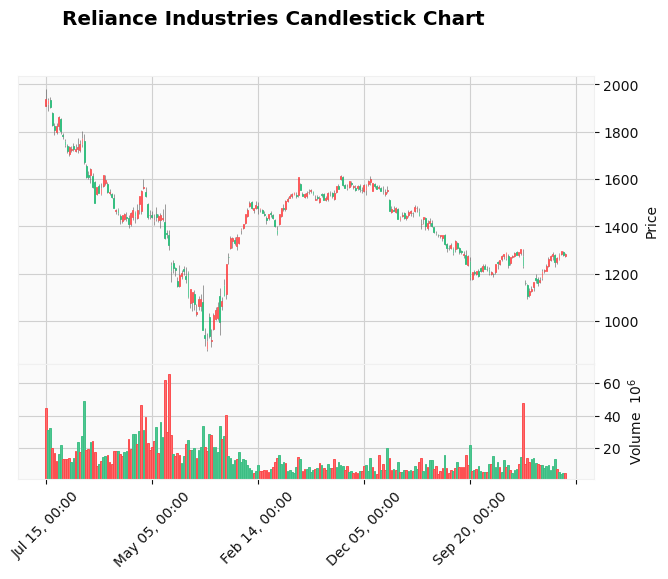

In [43]:
# Identify rows with problematic values
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    non_numeric = reliance_data[~reliance_data[col].str.replace(',', '').str.replace('.', '', 1).str.isnumeric()]
    print(f"Problematic values in column '{col}':\n", non_numeric)


import numpy as np

# Function to clean and convert data
def clean_and_convert(column):
    column = column.replace(',', '', regex=True)  # Remove commas
    column = column.replace(' ', '', regex=True)  # Remove any extra spaces
    column = column.replace('–', np.nan)  # Replace dash with NaN
    return pd.to_numeric(column, errors='coerce')  # Convert to numeric, set invalid parsing as NaN

# Apply the cleaning function to each column
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    reliance_data[col] = clean_and_convert(reliance_data[col])

# Check for any remaining NaN values
print(reliance_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].isna().sum())


# Example: Fill NaN values with the mean of the column
reliance_data = reliance_data.fillna(reliance_data.mean())

# Alternatively, you could drop rows with NaN values
# reliance_data = reliance_data.dropna(subset=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])



# Calculate the correlation matrix
correlation_matrix = reliance_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Display the correlation matrix
print(correlation_matrix)

import mplfinance as mpf

# Create a new DataFrame with the necessary columns for the candlestick chart
candlestick_data = reliance_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
candlestick_data.set_index('Date', inplace=True)

# Plot the candlestick chart
mpf.plot(candlestick_data, type='candle', volume=True, style='yahoo', title='Reliance Industries Candlestick Chart')
